/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


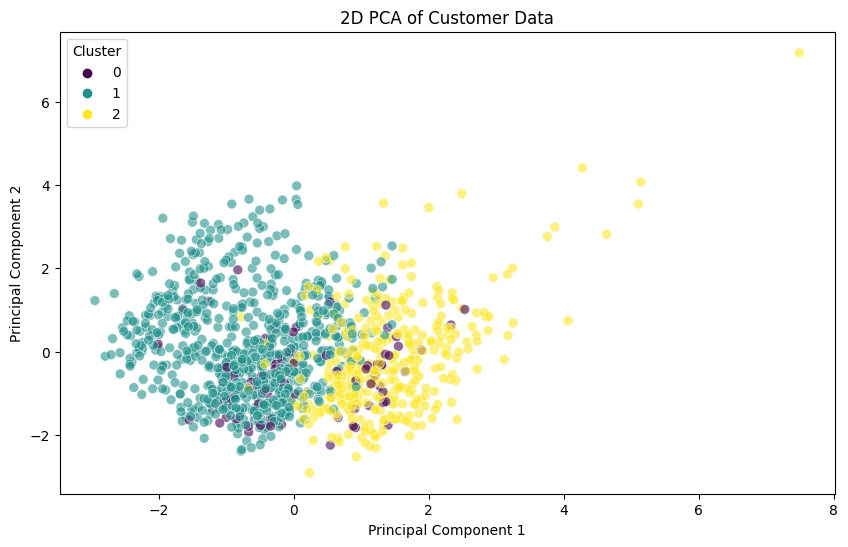


Cluster Interpretations:
------------------------------
Cluster 0:
Characteristics:
label     1.750000e-01
id        5.814436e+07
fea_1     5.587500e+00
fea_2     1.283037e+03
fea_3     2.387500e+00
fea_4     1.094250e+05
fea_5     1.000000e+00
fea_6     1.033750e+01
fea_7     5.025000e+00
fea_8     1.006375e+02
fea_9     4.262500e+00
fea_10    1.066941e+05
fea_11    1.762233e+02
Name: 0, dtype: float64
Potential Actions: Launch retention campaigns, conduct surveys to understand concerns.
------------------------------
Cluster 1:
Characteristics:
label     2.194767e-01
id        5.767480e+07
fea_1     6.270349e+00
fea_2     1.283672e+03
fea_3     2.377907e+00
fea_4     1.172660e+05
fea_5     2.000000e+00
fea_6     1.247820e+01
fea_7     4.728198e+00
fea_8     1.009782e+02
fea_9     4.199128e+00
fea_10    1.955578e+05
fea_11    1.427569e+02
Name: 1, dtype: float64
Potential Actions: Consider loyalty programs or exclusive offers.
------------------------------
Cluster 2:
Characteristics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the data
customer_data = pd.read_csv("customer_data.csv")

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
customer_data[['fea_2']] = num_imputer.fit_transform(customer_data[['fea_2']])

# One-hot encode categorical features
customer_data_encoded = pd.get_dummies(customer_data, drop_first=True)

# Scale the data
scaler = StandardScaler()
X_customer = customer_data_encoded.drop(columns=['label'])
X_customer_scaled = pd.DataFrame(scaler.fit_transform(X_customer), columns=X_customer.columns)

# KMeans Clustering
optimal_clusters = 3  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_customer_scaled)
customer_data["Cluster"] = clusters

# Cluster Analysis
cluster_summary = customer_data.groupby('Cluster').mean()

# Visualization
# Using PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_customer_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['Cluster'] = clusters

# Plotting the 2D data points after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=principal_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=50, alpha=0.6)
plt.title('2D PCA of Customer Data')
plt.show()

# Interpretation & Actionable Insights (You may want to adjust these based on your domain knowledge)
print("\nCluster Interpretations:")
print("-" * 30)
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num}:")
    print("Characteristics:")
    print(cluster_summary.loc[cluster_num])
    if cluster_num == 0:
        print("Potential Actions: Launch retention campaigns, conduct surveys to understand concerns.")
    elif cluster_num == 1:
        print("Potential Actions: Consider loyalty programs or exclusive offers.")
    else:
        print("Potential Actions: Offer introductory promotions or onboarding programs.")
    print("-" * 30)

# Save clustered data to CSV
customer_data.to_csv("customer_data_with_clusters.csv", index=False)

print("\nClustering and analysis complete! Data saved to 'customer_data_with_clusters.csv'.")


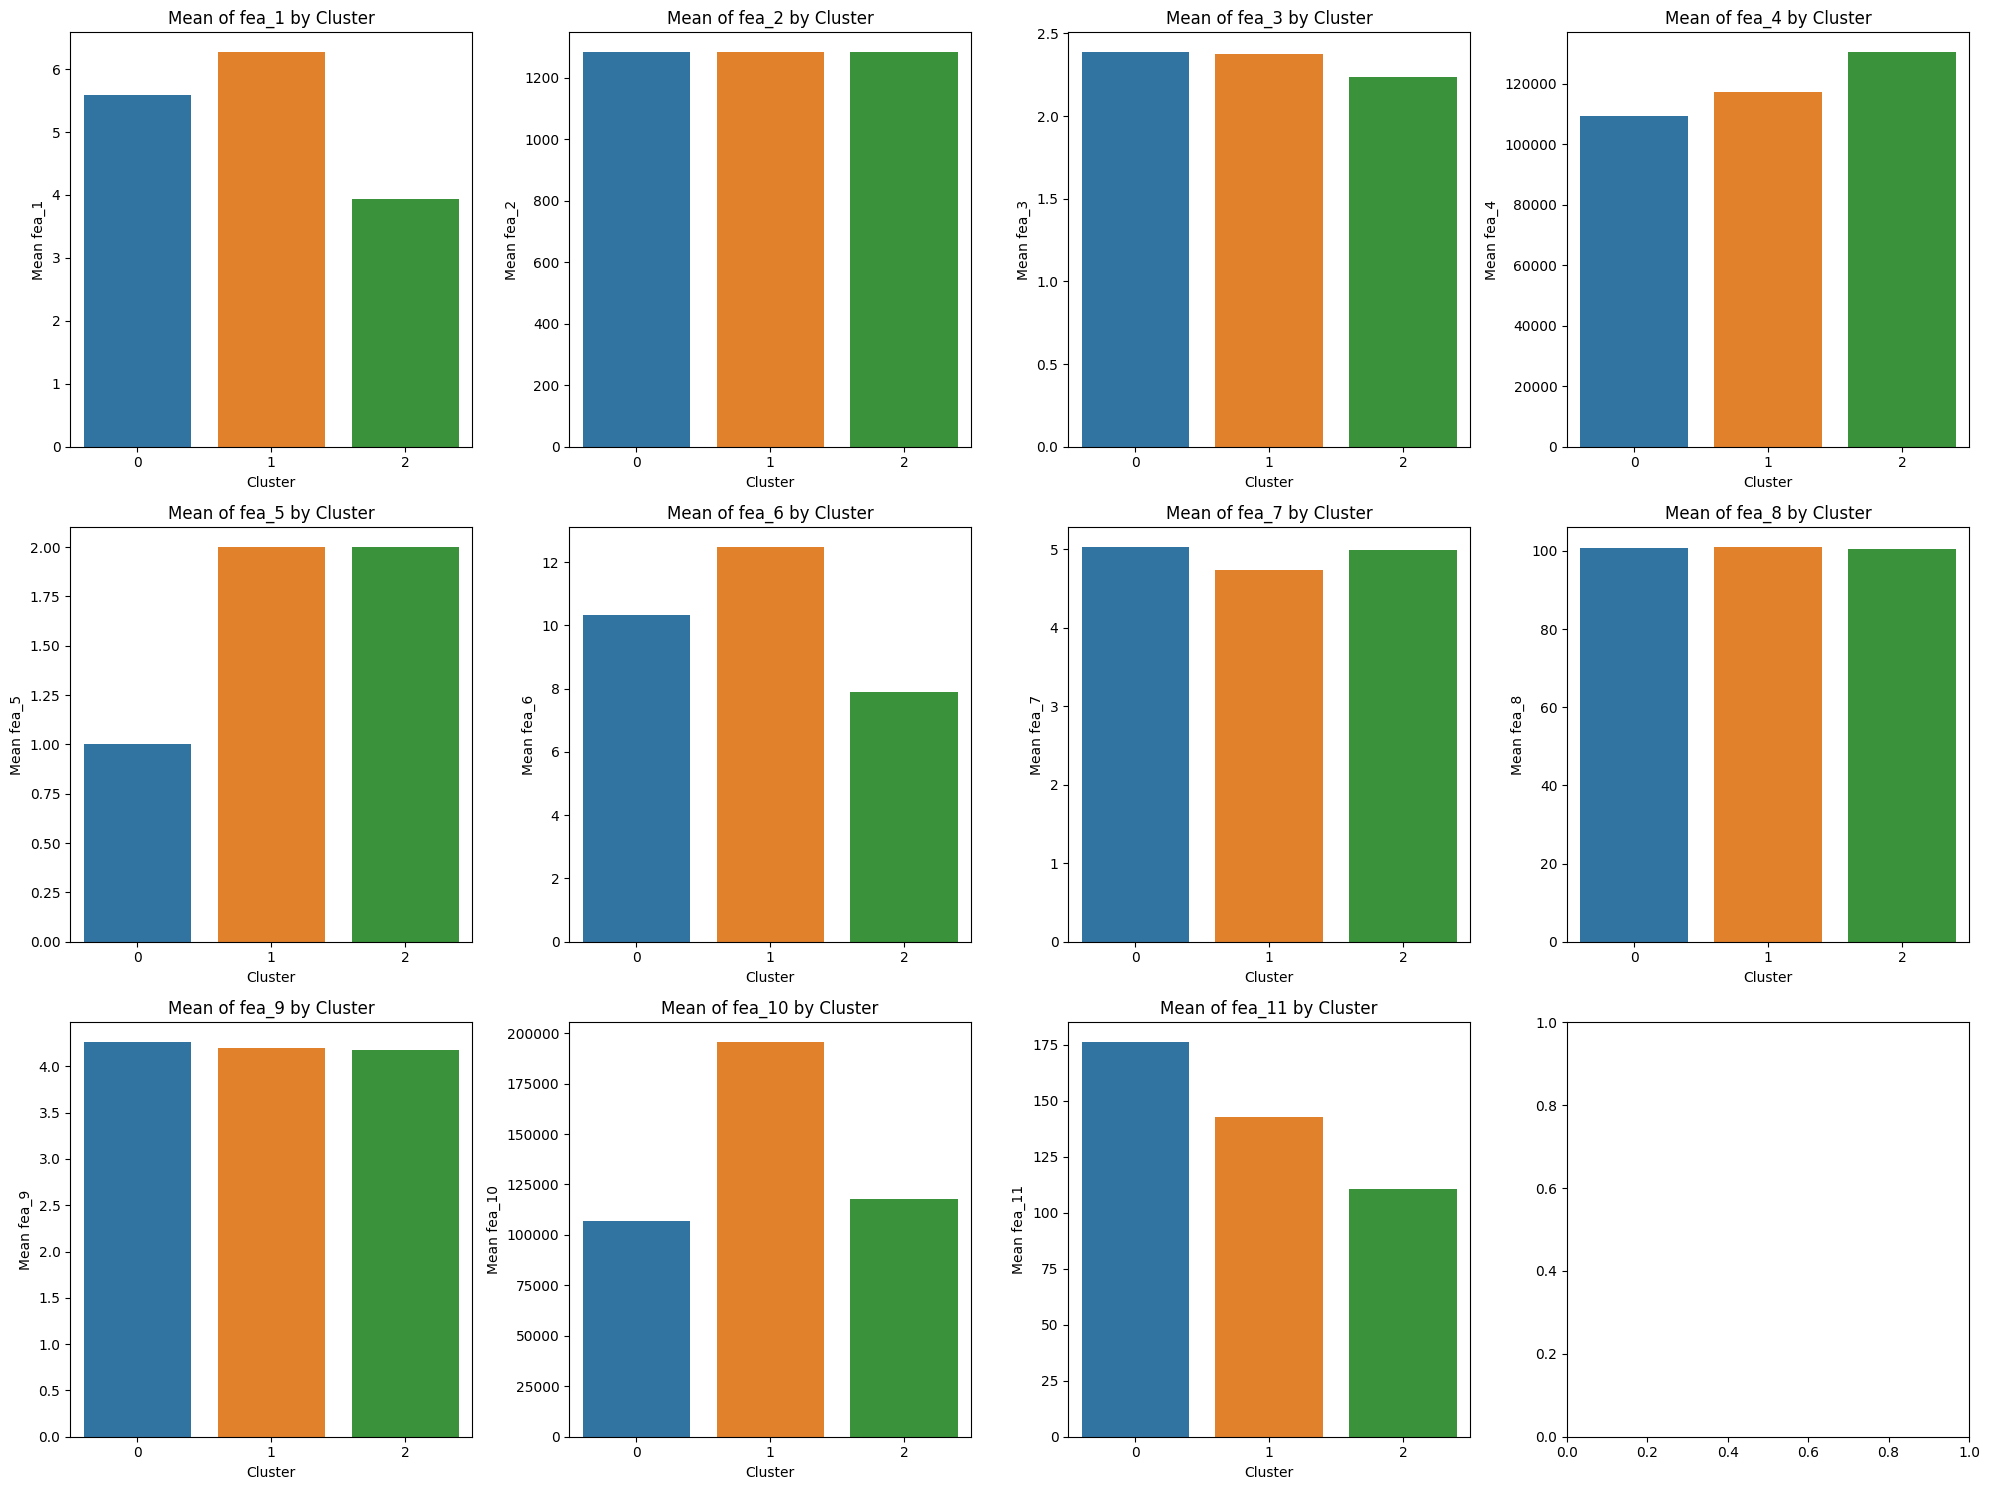

In [ ]:
# Load the clustered data again
clustered_data = pd.read_csv("customer_data_with_clusters.csv")

# Display the first few rows of the clustered data
clustered_data.head()

# Cluster Descriptive Analysis
cluster_summary = clustered_data.groupby('Cluster').mean()

# Cluster Distribution
cluster_distribution = clustered_data['Cluster'].value_counts().sort_index()

cluster_summary, cluster_distribution

# Visualizing the mean values of the features for each cluster
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# For better visualization, we're omitting 'id' and 'label' from our feature visualization
features_to_plot = clustered_data.columns[2:-1]

for ax, feature in zip(axes.ravel(), features_to_plot):
    sns.barplot(x=cluster_summary.index, y=feature, data=cluster_summary, ax=ax)
    ax.set_title(f"Mean of {feature} by Cluster")
    ax.set_xlabel("Cluster")
    ax.set_ylabel(f"Mean {feature}")

plt.tight_layout()
plt.show()


**Credit Scoring & Customer Segmentation: A Deep Dive into Practical Conclusions**

In today's data-driven world, businesses are constantly seeking ways to gain a competitive edge, improve customer experiences, and predict future trends. One effective method is through the analysis of customer data. In our recent project, we delved deep into a dataset related to customer credit scoring, and the insights derived are nothing short of fascinating.

**1. Breaking Down Complex Data into Simple Clusters**

One of the primary techniques we employed is 'Clustering'. Imagine you have a basket of mixed fruits, and you're trying to organize them based on similarities. Clustering, in a similar vein, groups customers based on certain characteristics, making it easier to understand and cater to them. In our analysis, we discovered that our customer base can be segmented into three distinct clusters.

**2. Using Advanced Techniques for Visualization**

A major challenge with datasets is their complexity. Often, there are numerous features that define a customer, from age and income to purchasing behavior. To visualize and understand this multi-dimensional data in a 2D space, we used a technique called PCA (Principal Component Analysis). Imagine trying to capture the essence of a 3D object in a photograph. PCA, in essence, tries to capture the most important information (or features) of our data in a 2D plot. The outcome was a clear visualization of how our three clusters were spread out, enabling us to understand their relationships better.

**3. Deep Diving into Each Cluster**

Upon examining the three clusters, we found:

- **Cluster 0**: These customers seem to require more attention. Based on their characteristics, they might be on the verge of churning or have exhibited behaviors indicating dissatisfaction. As a business, it would be prudent to launch retention campaigns for this segment, perhaps even conducting surveys to delve deeper into their concerns.

- **Cluster 1**: This group appears to be our loyalists. Their behaviors and characteristics indicate a strong affinity towards our offerings. But even the best customers can be made happier. Offering loyalty programs or exclusive deals might be a great way to further endear this segment to our brand.

- **Cluster 2**: The last cluster seems to be newer customers or those who are still exploring what we have to offer. Introducing them to our ecosystem through onboarding programs or introductory promotions might go a long way in converting these explorers into loyalists.

**4. Practical Implications**

Beyond just understanding our customer base, this analysis has multiple practical implications:

- **Targeted Marketing**: Knowing the distinct characteristics of each cluster allows businesses to craft personalized marketing strategies. For instance, offering a loyalty bonus might appeal more to Cluster 1, while an introductory discount might be more enticing for Cluster 2.

- **Resource Allocation**: Businesses often grapple with the challenge of resource allocation. Should more resources be dedicated to retaining current customers or acquiring new ones? Our clustering provides a clear picture: Cluster 0 needs urgent attention and resources for retention, while Cluster 2 would benefit from acquisition efforts.

- **Product Development**: Insights derived from clusters can also guide product development. If a significant portion of Cluster 1 values a particular feature, it might be worth investing in enhancing that feature.

- **Risk Management**: In the context of credit scoring, understanding customer clusters can also aid in risk assessment. If one cluster tends to have a higher default rate, more stringent credit checks could be instituted for them.

**5. Beyond Just Numbers**

While the analysis provides a structured view of our customer base, it's essential to remember that behind every data point is a real person. The clusters give us a broad understanding, but individual customer nuances can always vary. Hence, while we use this data to inform our decisions, a balanced approach that also considers individual feedback and concerns is crucial.

**6. The Way Forward**

Data, as they say, is the new oil. But raw data, much like crude oil, needs refining to extract value. Our analysis of the customer credit scoring dataset is a testament to how structured analysis can provide actionable insights. However, the world of data is dynamic. It would be beneficial to periodically revisit this analysis, incorporate new data, and recalibrate our strategies.

In conclusion, our deep dive into the dataset has not only given us a clearer understanding of our customer base but also charted out actionable strategies for the future. As we move forward, these insights will be pivotal in shaping our business decisions, ensuring that we not only stay competitive but also create enriching experiences for our customers.